In [1]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import tempfile
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from datetime import datetime


In [2]:
from station.data_submission import DataSubmission
from station.station import StationData

from station.dat_to_nc_converter import DatToNcConverter
#from station.dat_to_nc_convertercopy2 import DatToNcConverter
from station.dat_to_nc_all_var import DatToNcAllVar


In [6]:
# Example usage
directory = "measurements/Barbados"
converter = DatToNcConverter(name="Barbados", directory=directory)
converter.execute()


Extracting Barbados...


100%|██████████| 1263/1263 [01:01<00:00, 20.57it/s]


(17315,) hourly temperature values in dataframe
Saving to /Users/ferdinand/Desktop/MasterThesis/digital-twin-for-weather-station/station_data_as_nc/barbados.nc


In [3]:
ds = xr.open_dataset("station_data_as_nc/barbados.nc")
ds

<xarray.Dataset> Size: 277kB
Dimensions:  (time: 17315, lat: 1, lon: 1)
Coordinates:
  * time     (time) datetime64[ns] 139kB 2020-06-23T18:00:00 ... 2023-11-22T1...
  * lat      (lat) float64 8B 13.16
  * lon      (lon) float64 8B -59.54
Data variables:
    tas      (time, lat, lon) float64 139kB ...

Extracting Barbados...


100%|██████████| 1263/1263 [01:02<00:00, 20.36it/s]
/Users/ferdinand/Desktop/MasterThesis/digital-twin-for-weather-station/station/station.py:25: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plot_df = plot_df.reindex(pd.date_range(start=plot_df.index.min(),
/Users/ferdinand/Desktop/MasterThesis/digital-twin-for-weather-station/station/station.py:37: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plot_df = plot_df.reindex(pd.date_range(start=plot_df.index.min(),


displaying lon: -59.54316
as -59.543


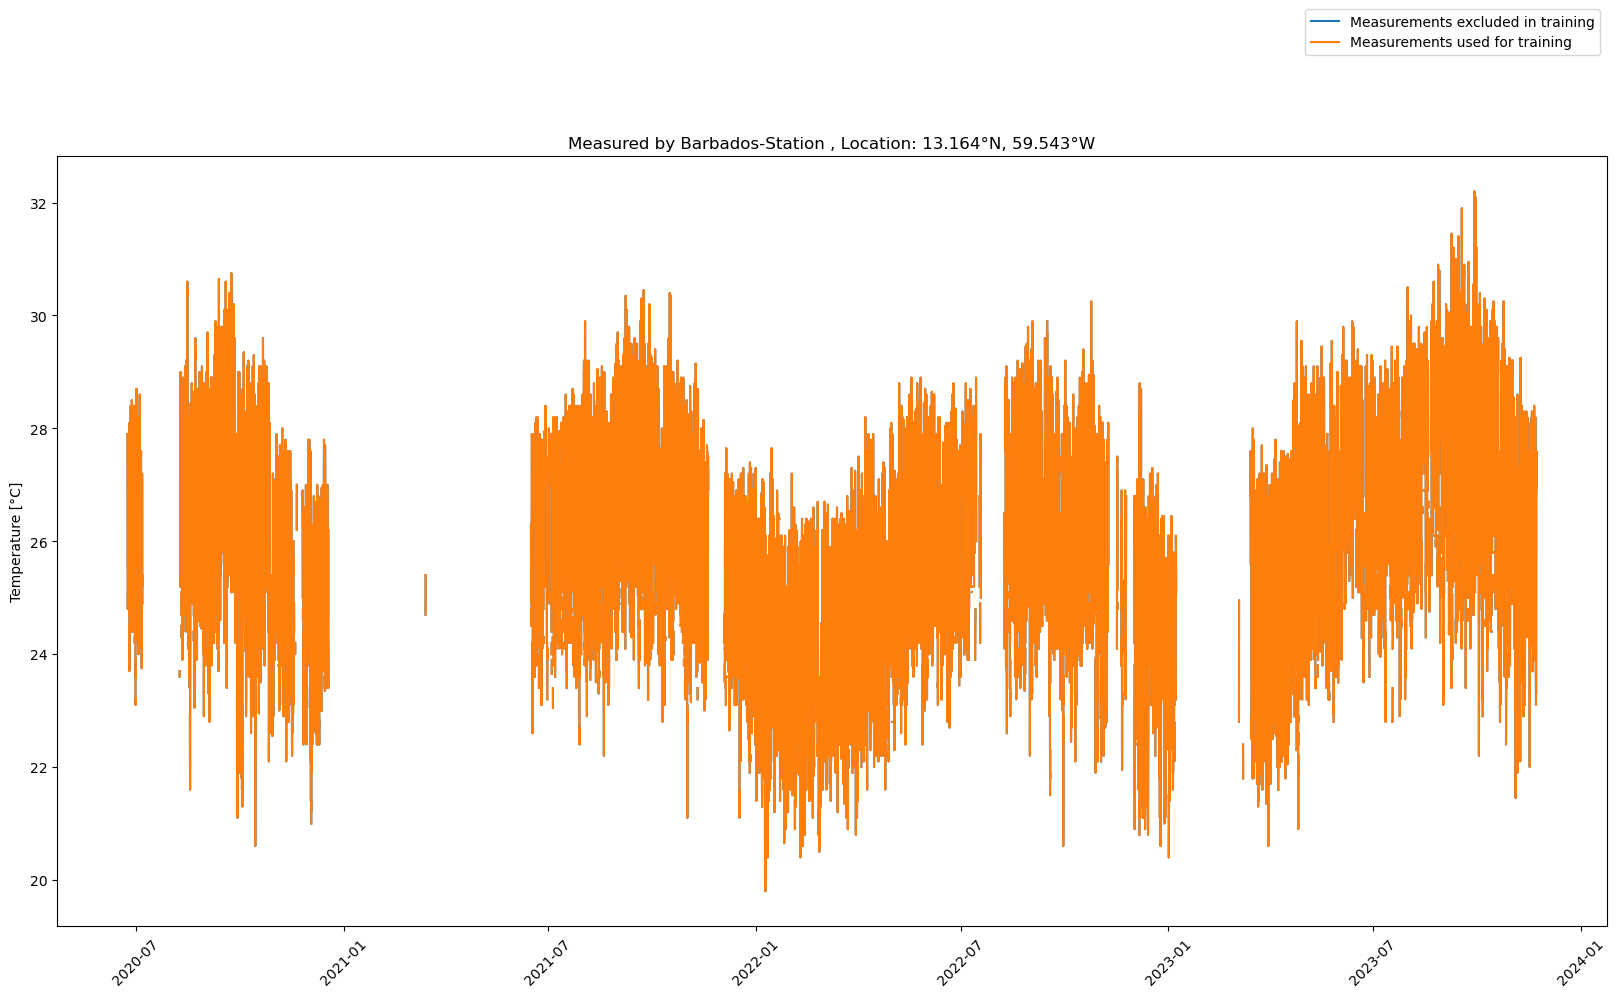

In [7]:
barbados_data = DataSubmission("Barbados")
barbados_data.measurement_dir_path = "./measurements/Barbados/"

barbados_station = StationData(
    name=barbados_data.name,
    folder_path=barbados_data.measurement_dir_path
)



Extracting Vienna...


100%|██████████| 1857/1857 [01:43<00:00, 18.02it/s]
/Users/ferdinand/Desktop/MasterThesis/digital-twin-for-weather-station/station/station.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plot_df = plot_df.reindex(pd.date_range(start=plot_df.index.min(),
/Users/ferdinand/Desktop/MasterThesis/digital-twin-for-weather-station/station/station.py:38: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plot_df = plot_df.reindex(pd.date_range(start=plot_df.index.min(),


TypeError: type NoneType doesn't define __round__ method

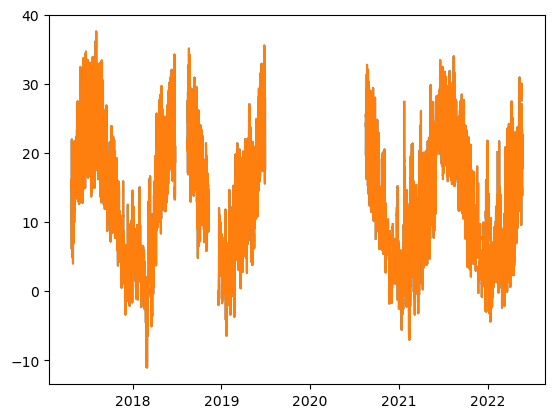

In [3]:
# Initialize the DataSubmission object
vienna_data = DataSubmission("Vienna")
vienna_data.measurement_dir_path = "./measurements/Vienna/"

# Process the station data
vienna_station = StationData(
    name=vienna_data.name,
    folder_path=vienna_data.measurement_dir_path
)

# Export the data as a NetCDF file to a different directory
target_directory = "/./measurements/Vienna/"
vienna_station.export_as_nc(target_directory=target_directory)

Extracting Vienna...


100%|██████████| 1857/1857 [02:29<00:00, 12.44it/s]
/Users/ferdinand/Desktop/MasterThesis/digital-twin-for-weather-station/station/station.py:25: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plot_df = plot_df.reindex(pd.date_range(start=plot_df.index.min(),
/Users/ferdinand/Desktop/MasterThesis/digital-twin-for-weather-station/station/station.py:37: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plot_df = plot_df.reindex(pd.date_range(start=plot_df.index.min(),


displaying lon: 16.3609
as 16.361


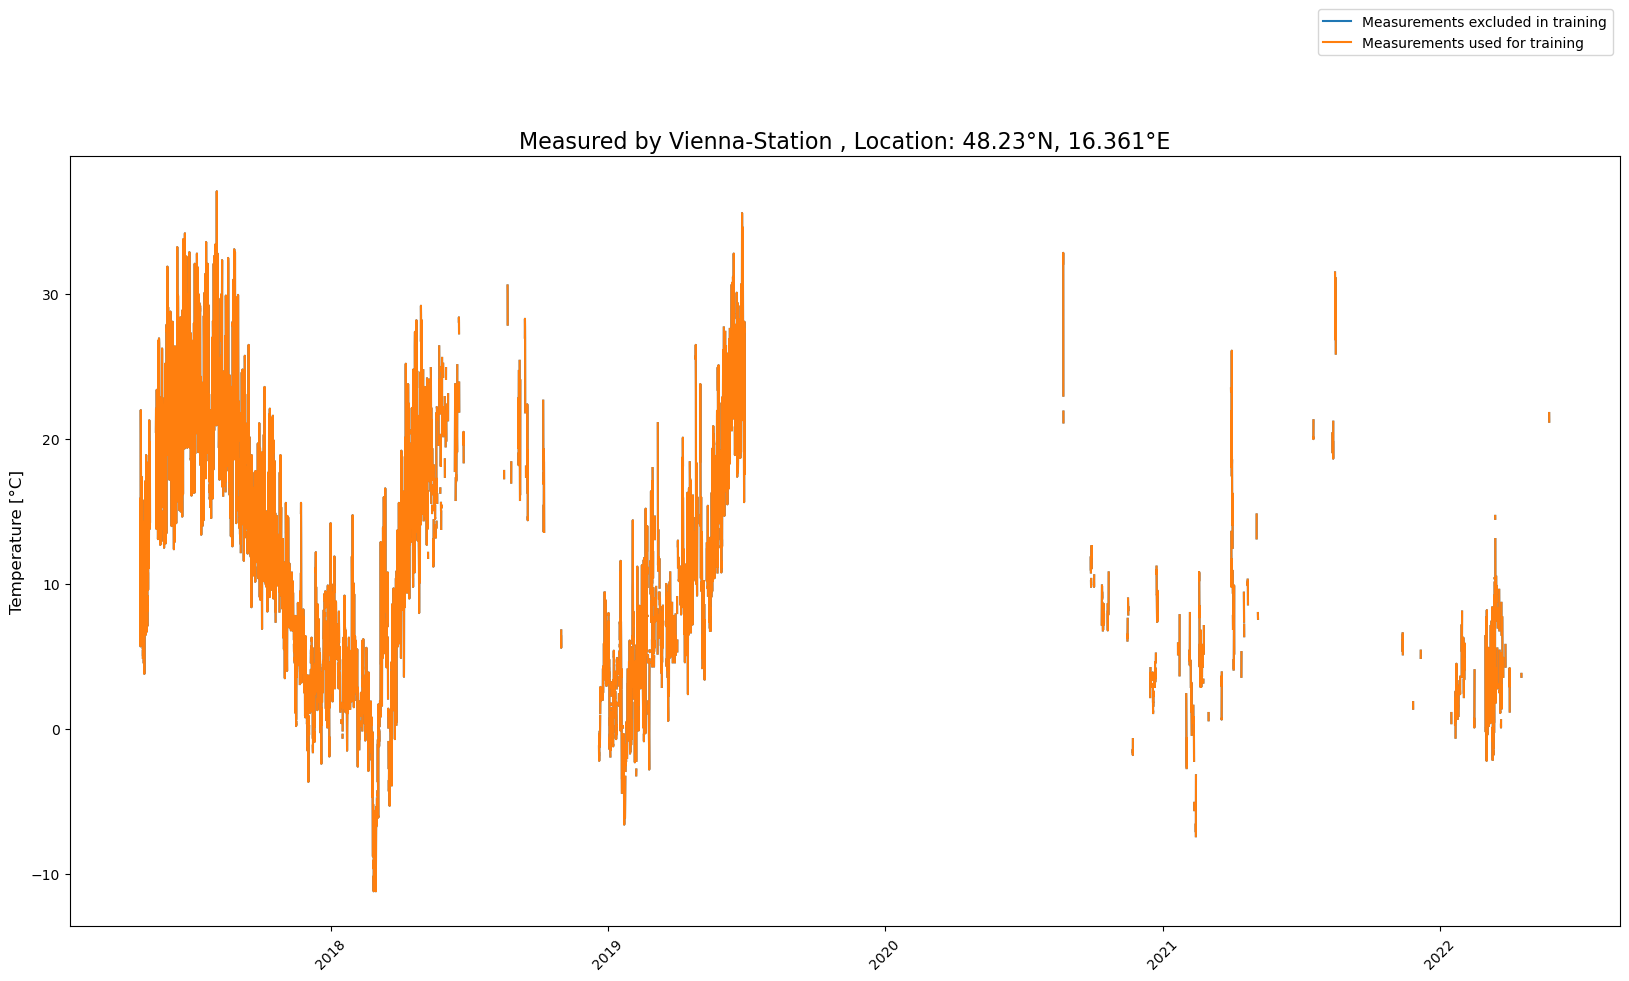

(12477,) hourly temperature values in dataframe
Saving to /./measurements/Vienna//vienna.nc


PermissionError: [Errno 13] Permission denied: '/measurements/Vienna/vienna.nc'

In [51]:
# Initialize the DataSubmission object
vienna_data = DataSubmission("Vienna")
vienna_data.measurement_dir_path = "./measurements/Vienna/"

# Process the station data
vienna_station = StationData(
    name=vienna_data.name,
    folder_path=vienna_data.measurement_dir_path
)

# Export the data as a NetCDF file to a different directory
target_directory = "/./measurements/Vienna/"
vienna_station.export_as_nc(target_directory=target_directory)




In [55]:
# Export the data as a NetCDF file to a different directory
target_directory = "./measurements/Vienna"
vienna_station.export_as_nc(target_directory=target_directory)

(12477,) hourly temperature values in dataframe
Saving to ./measurements/Vienna/vienna.nc


'./measurements/Vienna/vienna.nc'

In [4]:
vienna_data = xr.open_dataset("./measurements/Vienna/vienna.nc")
vienna_data

<xarray.Dataset> Size: 200kB
Dimensions:  (time: 12477, lat: 1, lon: 1)
Coordinates:
  * time     (time) datetime64[ns] 100kB 2017-04-24T14:00:00 ... 2022-05-24T1...
  * lat      (lat) float64 8B 48.23
  * lon      (lon) float64 8B 16.36
Data variables:
    tas      (time, lat, lon) float64 100kB ...

In [6]:
def load_and_process_dat_files(directory):
    def process_file(file_path):
        df = pd.read_csv(file_path, sep="\s+", header=0)
        df["datetime"] = df.apply(lambda row: datetime(int(row["year"]), int(row["mon"]), int(row["day"]), int(row["hour"]), int(row["min"])), axis=1)
        df = df.drop(columns=["year", "mon", "day", "hour", "min"])
        df = df.replace(-999.99, np.nan)
        return df

    all_dfs = []
    for file in os.listdir(directory):
        if file.endswith(".dat"):
            file_path = os.path.join(directory, file)
            df = process_file(file_path)
            all_dfs.append(df)
    
    combined_df = pd.concat(all_dfs).reset_index(drop=True)
    return combined_df

In [7]:
# Example usage
directory = "measurements/Barbados"
combined_df = load_and_process_dat_files(directory)

# Print column names
print(combined_df.columns)

combined_df.head()


Index(['bmp180_temp', 'bmp180_pres', 'bmp180_slp', 'bmp180_alt', 'bmp280_temp',
       'bmp280_pres', 'bmp280_slp', 'bmp280_alt', 'bme_temp', 'bme_pres',
       'bme_slp', 'bme_alt', 'bme_hum', 'htu_temp', 'htu_hum', 'mcp9808',
       'tipping', 'vis_light', 'ir_light', 'uv_light', 'wind_dir',
       'wind_speed', 'datetime'],
      dtype='object')


,bmp180_temp,bmp180_pres,bmp180_slp,bmp180_alt,bmp280_temp,bmp280_pres,bmp280_slp,bmp280_alt,bme_temp,bme_pres,...,htu_temp,htu_hum,mcp9808,tipping,vis_light,ir_light,uv_light,wind_dir,wind_speed,datetime
0,NaN,NaN,NaN,NaN,24.85,729.19,752.39,274.0,NaN,NaN,...,23.9,84.7,NaN,0.0,260.0,253.0,2.0,NaN,2.95,2021-01-27 00:00:00
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,261.0,252.0,2.0,NaN,2.96,2021-01-27 00:01:00
2,NaN,NaN,NaN,NaN,24.85,729.19,752.39,274.0,NaN,NaN,...,23.9,84.6,23.8,0.0,259.0,253.0,1.0,NaN,3.42,2021-01-27 00:02:00
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,23.8,0.0,261.0,251.0,2.0,NaN,2.55,2021-01-27 00:03:00
4,NaN,NaN,NaN,NaN,24.85,729.19,752.39,274.0,NaN,NaN,...,23.9,84.3,23.8,0.0,261.0,254.0,2.0,NaN,2.79,2021-01-27 00:04:00


In [10]:
combined_df.describe()

,bmp180_temp,bmp180_pres,bmp180_slp,bmp180_alt,bmp280_temp,bmp280_pres,bmp280_slp,bmp280_alt,bme_temp,bme_pres,...,htu_temp,htu_hum,mcp9808,tipping,vis_light,ir_light,uv_light,wind_dir,wind_speed,datetime
count,0.0,0.0,0.0,0.0,1.395377e+06,1.395378e+06,1.395368e+06,1395392.0,0.0,0.0,...,1.427629e+06,943240.000000,1.311723e+06,1.738321e+06,1.396726e+06,1.396757e+06,1.394328e+06,431477.0,1.736274e+06,1817508
mean,NaN,NaN,NaN,NaN,2.598583e+01,9.332898e+02,9.628658e+02,274.0,NaN,NaN,...,2.259092e+01,86.010551,2.479436e+01,3.238297e-03,4.199162e+02,1.936871e+03,8.883705e+01,0.0,2.856802e+00,2022-03-01 17:30:30.000000256
min,NaN,NaN,NaN,NaN,-3.918000e+01,3.107400e+02,3.206700e+02,274.0,NaN,NaN,...,-2.650000e+01,46.500000,-3.840000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,2020-06-08 15:37:00
25%,NaN,NaN,NaN,NaN,2.455000e+01,9.826200e+02,1.013680e+03,274.0,NaN,NaN,...,2.250000e+01,80.100000,2.390000e+01,0.000000e+00,2.600000e+02,2.530000e+02,2.000000e+00,0.0,1.500000e+00,2021-04-20 04:33:45
50%,NaN,NaN,NaN,NaN,2.568000e+01,9.845700e+02,1.015760e+03,274.0,NaN,NaN,...,2.440000e+01,87.000000,2.510000e+01,0.000000e+00,2.680000e+02,3.220000e+02,5.000000e+00,0.0,2.640000e+00,2022-03-01 17:30:30
75%,NaN,NaN,NaN,NaN,2.726000e+01,9.858800e+02,1.017110e+03,274.0,NaN,NaN,...,2.580000e+01,92.700000,2.660000e+01,0.000000e+00,5.080000e+02,2.806000e+03,1.350000e+02,0.0,3.710000e+00,2023-01-11 06:27:15
max,NaN,NaN,NaN,NaN,8.441000e+01,1.084970e+03,1.119660e+03,274.0,NaN,NaN,...,1.243000e+02,99.900000,1.239000e+02,1.260000e+01,1.960000e+03,1.405200e+04,9.840000e+02,0.0,9.998000e+01,2023-11-22 19:24:00
std,NaN,NaN,NaN,NaN,2.037924e+00,1.147523e+02,1.183235e+02,0.0,NaN,NaN,...,5.825661e+00,8.425503,4.298615e+00,5.012715e-02,2.490730e+02,2.568407e+03,1.316282e+02,0.0,3.909653e+00,NaN


In [22]:
combined_df.tail()

,bmp180_temp,bmp180_pres,bmp180_slp,bmp180_alt,bmp280_temp,bmp280_pres,bmp280_slp,bmp280_alt,bme_temp,bme_pres,...,htu_temp,htu_hum,mcp9808,tipping,vis_light,ir_light,uv_light,wind_dir,wind_speed,datetime
1817503,NaN,NaN,NaN,NaN,24.61,983.54,1014.86,274.0,NaN,NaN,...,23.2,84.4,23.6,0.0,260.0,252.0,2.0,NaN,2.07,2021-12-20 23:55:00
1817504,NaN,NaN,NaN,NaN,24.62,983.59,1014.91,274.0,NaN,NaN,...,23.2,84.4,23.5,0.0,261.0,254.0,2.0,NaN,1.62,2021-12-20 23:56:00
1817505,NaN,NaN,NaN,NaN,24.61,983.63,1014.96,274.0,NaN,NaN,...,23.2,84.5,23.6,0.0,260.0,253.0,2.0,NaN,2.05,2021-12-20 23:57:00
1817506,NaN,NaN,NaN,NaN,24.60,983.61,1014.94,274.0,NaN,NaN,...,23.2,84.6,23.6,0.0,260.0,254.0,2.0,NaN,2.18,2021-12-20 23:58:00
1817507,NaN,NaN,NaN,NaN,24.61,983.57,1014.89,274.0,NaN,NaN,...,23.2,84.5,23.6,0.0,259.0,253.0,1.0,NaN,2.14,2021-12-20 23:59:00


<Figure size 1000x600 with 0 Axes>

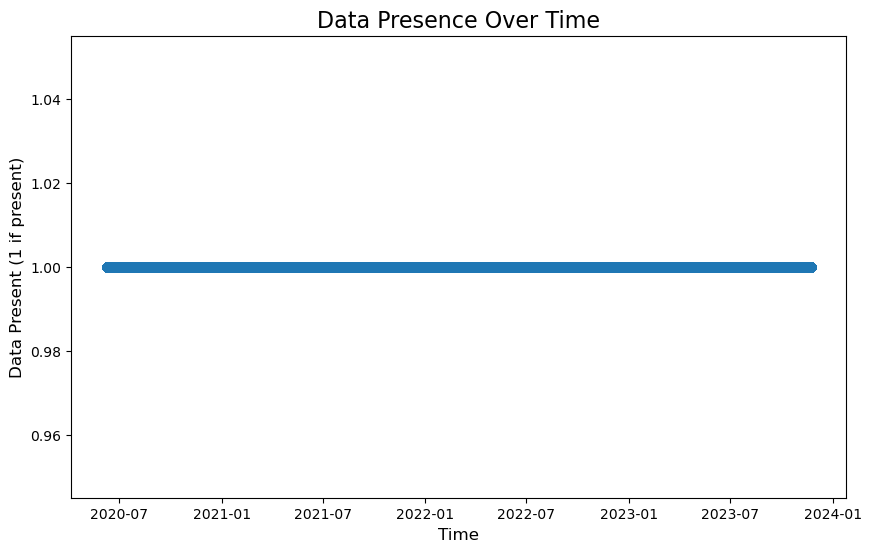

In [28]:
plt.figure(figsize=(10, 6))
# Create a column indicating data presence (1) for all rows
combined_df['data_present'] = 1

# Plot the data presence over time
plt.figure(figsize=(10, 6))
plt.plot(combined_df['datetime'], combined_df['data_present'], marker='o', linestyle='None')
plt.title('Data Presence Over Time')
plt.xlabel('Time')
plt.ylabel('Data Present (1 if present)')
plt.show()


<Figure size 1000x600 with 0 Axes>

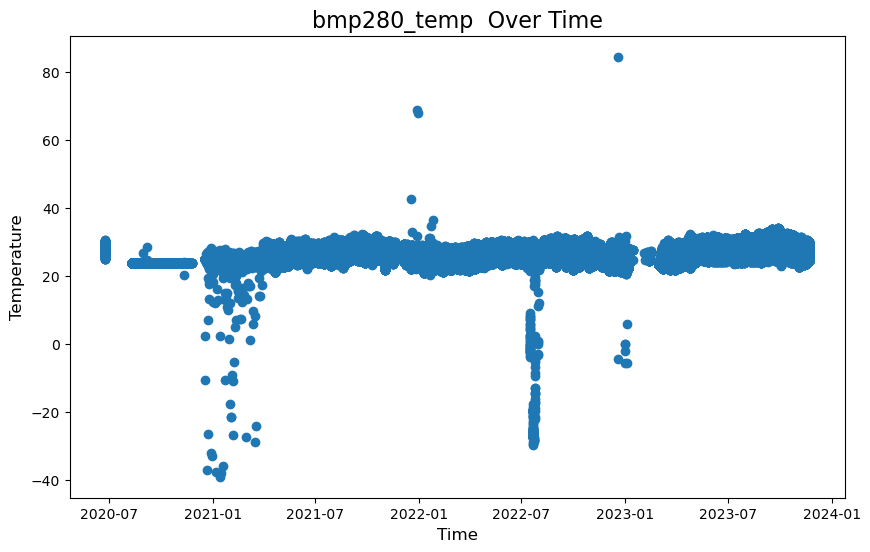

In [30]:
plt.figure(figsize=(10, 6))

# Plot the data presence over time
plt.figure(figsize=(10, 6))
plt.plot(combined_df['datetime'], combined_df['bmp280_temp'], marker='o', linestyle='None')
plt.title('bmp280_temp  Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.show()


<Figure size 1000x600 with 0 Axes>

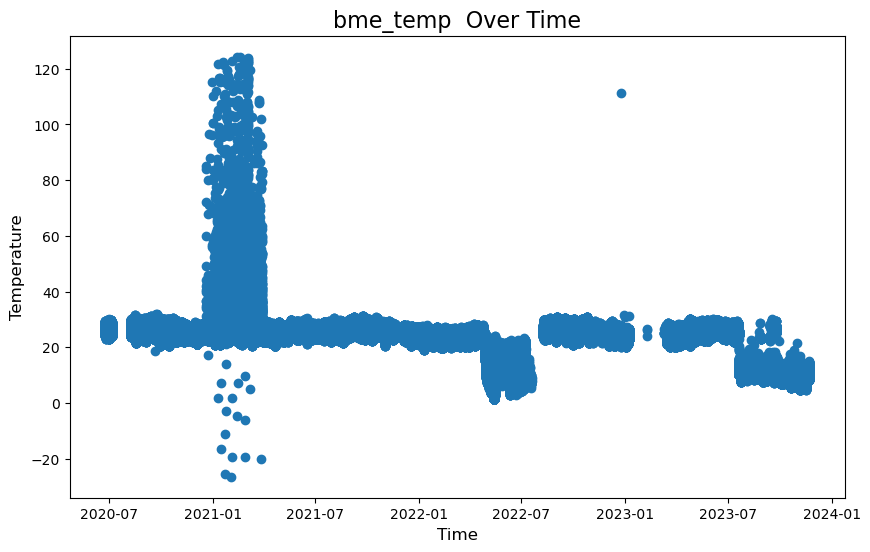

In [32]:
plt.figure(figsize=(10, 6))

# Plot the data presence over time
plt.figure(figsize=(10, 6))
plt.plot(combined_df['datetime'], combined_df['htu_temp'], marker='o', linestyle='None')
plt.title('htu_temp  Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.show()


<Figure size 1000x600 with 0 Axes>

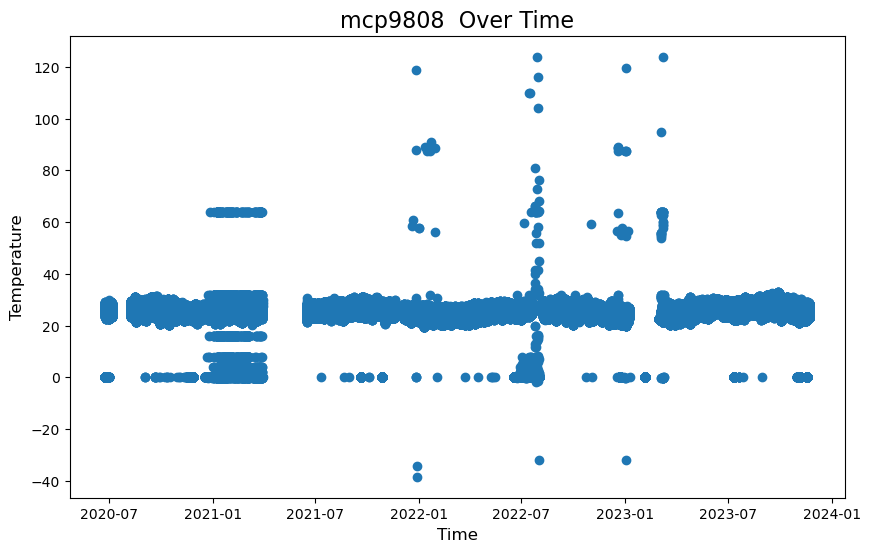

In [33]:
plt.figure(figsize=(10, 6))

# Plot the data presence over time
plt.figure(figsize=(10, 6))
plt.plot(combined_df['datetime'], combined_df['mcp9808'], marker='o', linestyle='None')
plt.title('mcp9808  Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.show()

<Figure size 1000x600 with 0 Axes>

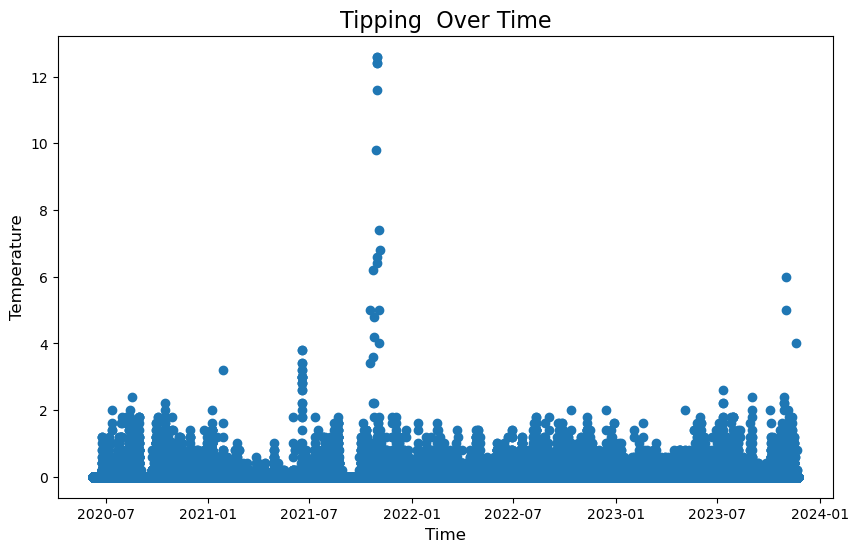

In [42]:
plt.figure(figsize=(10, 6))

# Plot the data presence over time
plt.figure(figsize=(10, 6))
plt.plot(combined_df['datetime'], combined_df['tipping'], marker='o', linestyle='None')
plt.title('Tipping  Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.show()


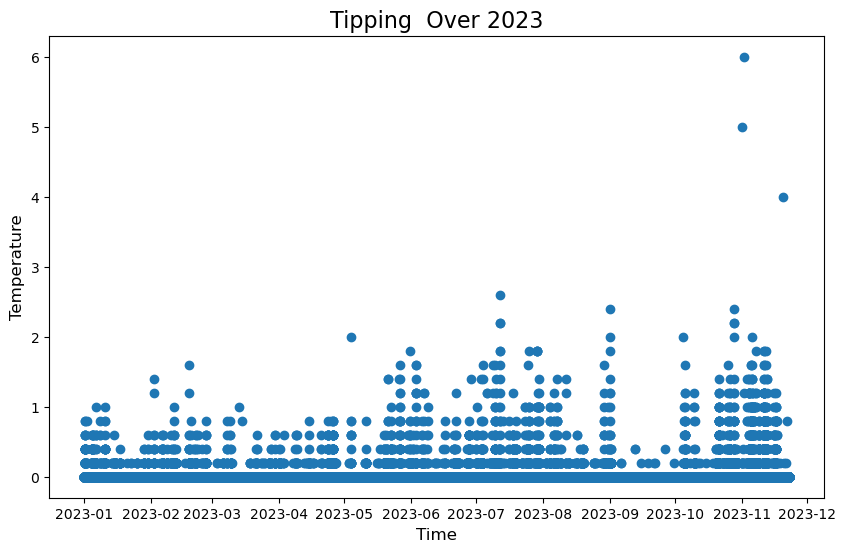

In [41]:
start = "2023-01-01"
end = "2023-12-31"

filtered_df = combined_df[(combined_df["datetime"] >= start) & (combined_df["datetime"] <= end)]

# Plot the data presence over time
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['datetime'], filtered_df['tipping'], marker='o', linestyle='None')
plt.title('Tipping  Over 2023')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.show()


In [37]:
combined_df.describe()

,bmp180_temp,bmp180_pres,bmp180_slp,bmp180_alt,bmp280_temp,bmp280_pres,bmp280_slp,bmp280_alt,bme_temp,bme_pres,...,htu_hum,mcp9808,tipping,vis_light,ir_light,uv_light,wind_dir,wind_speed,datetime,data_present
count,0.0,0.0,0.0,0.0,1.395377e+06,1.395378e+06,1.395368e+06,1395392.0,0.0,0.0,...,943240.000000,1.311723e+06,1.738321e+06,1.396726e+06,1.396757e+06,1.394328e+06,431477.0,1.736274e+06,1817508,1817508.0
mean,NaN,NaN,NaN,NaN,2.598583e+01,9.332898e+02,9.628658e+02,274.0,NaN,NaN,...,86.010551,2.479436e+01,3.238297e-03,4.199162e+02,1.936871e+03,8.883705e+01,0.0,2.856802e+00,2022-03-01 17:30:30.000000256,1.0
min,NaN,NaN,NaN,NaN,-3.918000e+01,3.107400e+02,3.206700e+02,274.0,NaN,NaN,...,46.500000,-3.840000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,2020-06-08 15:37:00,1.0
25%,NaN,NaN,NaN,NaN,2.455000e+01,9.826200e+02,1.013680e+03,274.0,NaN,NaN,...,80.100000,2.390000e+01,0.000000e+00,2.600000e+02,2.530000e+02,2.000000e+00,0.0,1.500000e+00,2021-04-20 04:33:45,1.0
50%,NaN,NaN,NaN,NaN,2.568000e+01,9.845700e+02,1.015760e+03,274.0,NaN,NaN,...,87.000000,2.510000e+01,0.000000e+00,2.680000e+02,3.220000e+02,5.000000e+00,0.0,2.640000e+00,2022-03-01 17:30:30,1.0
75%,NaN,NaN,NaN,NaN,2.726000e+01,9.858800e+02,1.017110e+03,274.0,NaN,NaN,...,92.700000,2.660000e+01,0.000000e+00,5.080000e+02,2.806000e+03,1.350000e+02,0.0,3.710000e+00,2023-01-11 06:27:15,1.0
max,NaN,NaN,NaN,NaN,8.441000e+01,1.084970e+03,1.119660e+03,274.0,NaN,NaN,...,99.900000,1.239000e+02,1.260000e+01,1.960000e+03,1.405200e+04,9.840000e+02,0.0,9.998000e+01,2023-11-22 19:24:00,1.0
std,NaN,NaN,NaN,NaN,2.037924e+00,1.147523e+02,1.183235e+02,0.0,NaN,NaN,...,8.425503,4.298615e+00,5.012715e-02,2.490730e+02,2.568407e+03,1.316282e+02,0.0,3.909653e+00,NaN,0.0


In [38]:
# Count the number of times tipping is 0.0
tipping_zero_count = combined_df[combined_df['tipping'] == 0.0].shape[0]

# Count the number of times tipping is non-zero and not NaN
tipping_non_zero_count = combined_df[(combined_df['tipping'] != 0.0) & (combined_df['tipping'].notna())].shape[0]

# Total count of rows where tipping is not NaN
tipping_total_count = combined_df[combined_df['tipping'].notna()].shape[0]

# Print the counts
print(f"Tipping equals 0.0: {tipping_zero_count}")
print(f"Tipping is non-zero and not NaN: {tipping_non_zero_count}")
print(f"Total number of tipping measurements (non-NaN): {tipping_total_count}")

# Calculate percentages
tipping_zero_percentage = (tipping_zero_count / tipping_total_count) * 100
tipping_non_zero_percentage = (tipping_non_zero_count / tipping_total_count) * 100

print(f"Percentage of tipping values equal to 0.0: {tipping_zero_percentage:.2f}%")
print(f"Percentage of tipping values non-zero: {tipping_non_zero_percentage:.2f}%")


Tipping equals 0.0: 1721851
Tipping is non-zero and not NaN: 16470
Total number of tipping measurements (non-NaN): 1738321
Percentage of tipping values equal to 0.0: 99.05%
Percentage of tipping values non-zero: 0.95%


In [43]:
# Example usage
directory = "measurements/Vienna"
vienna_combined_df = load_and_process_dat_files(directory)

vienna_combined_df.head()

,bmp180_temp,bmp180_pres,bmp180_slp,bmp180_alt,bmp280_temp,bmp280_pres,bmp280_slp,bmp280_alt,bme_temp,bme_pres,...,htu_temp,htu_hum,mcp9808,tipping,vis_light,ir_light,uv_light,wind_dir,wind_speed,datetime
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.4,58.4,NaN,0.0,262.0,253.0,3.0,335.8,0.72,2019-02-20 00:00:00
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.4,58.1,NaN,0.0,261.0,253.0,2.0,37.9,0.38,2019-02-20 00:01:00
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.4,58.4,NaN,0.0,261.0,253.0,2.0,27.3,0.56,2019-02-20 00:02:00
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.3,59.2,NaN,0.0,260.0,254.0,2.0,5.3,0.17,2019-02-20 00:03:00
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.3,59.2,NaN,0.0,260.0,253.0,2.0,112.4,0.30,2019-02-20 00:04:00


<Figure size 1000x600 with 0 Axes>

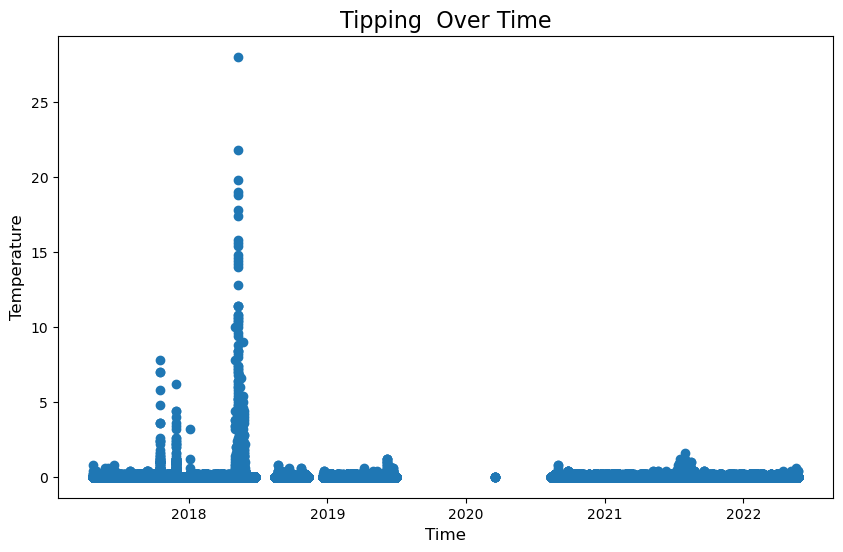

In [45]:
plt.figure(figsize=(10, 6))

# Plot the data presence over time
plt.figure(figsize=(10, 6))
plt.plot(vienna_combined_df['datetime'], vienna_combined_df['tipping'], marker='o', linestyle='None')
plt.title('Tipping  Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.show()


In [44]:
# Count the number of times tipping is 0.0
tipping_zero_count = vienna_combined_df[vienna_combined_df['tipping'] == 0.0].shape[0]

# Count the number of times tipping is non-zero and not NaN
tipping_non_zero_count = vienna_combined_df[(vienna_combined_df['tipping'] != 0.0) & (vienna_combined_df['tipping'].notna())].shape[0]

# Total count of rows where tipping is not NaN
tipping_total_count = vienna_combined_df[vienna_combined_df['tipping'].notna()].shape[0]

# Print the counts
print(f"Tipping equals 0.0: {tipping_zero_count}")
print(f"Tipping is non-zero and not NaN: {tipping_non_zero_count}")
print(f"Total number of tipping measurements (non-NaN): {tipping_total_count}")

# Calculate percentages
tipping_zero_percentage = (tipping_zero_count / tipping_total_count) * 100
tipping_non_zero_percentage = (tipping_non_zero_count / tipping_total_count) * 100

print(f"Percentage of tipping values equal to 0.0: {tipping_zero_percentage:.2f}%")
print(f"Percentage of tipping values non-zero: {tipping_non_zero_percentage:.2f}%")

Tipping equals 0.0: 1918917
Tipping is non-zero and not NaN: 5721
Total number of tipping measurements (non-NaN): 1924638
Percentage of tipping values equal to 0.0: 99.70%
Percentage of tipping values non-zero: 0.30%


In [46]:
# Example usage
directory = "measurements/Marshall"
marshall_combined_df = load_and_process_dat_files(directory)

marshall_combined_df.head()

,bmp180_temp,bmp180_pres,bmp180_slp,bmp180_alt,bmp280_temp,bmp280_pres,bmp280_slp,bmp280_alt,bme_temp,bme_pres,...,htu_temp,htu_hum,mcp9808,tipping,vis_light,ir_light,uv_light,wind_dir,wind_speed,datetime
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32.3,15.7,31.5,0.0,527.0,3049.0,145.0,0.0,0.0,2021-07-27 00:00:00
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.9,15.0,31.4,0.0,523.0,3014.0,143.0,0.0,0.0,2021-07-27 00:01:00
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.7,12.3,31.2,0.0,520.0,2990.0,141.0,0.0,0.0,2021-07-27 00:02:00
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.7,17.6,31.2,0.0,517.0,2965.0,139.0,NaN,NaN,2021-07-27 00:03:00
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.7,18.0,31.2,0.0,516.0,2939.0,139.0,0.0,0.0,2021-07-27 00:04:00


<Figure size 1000x600 with 0 Axes>

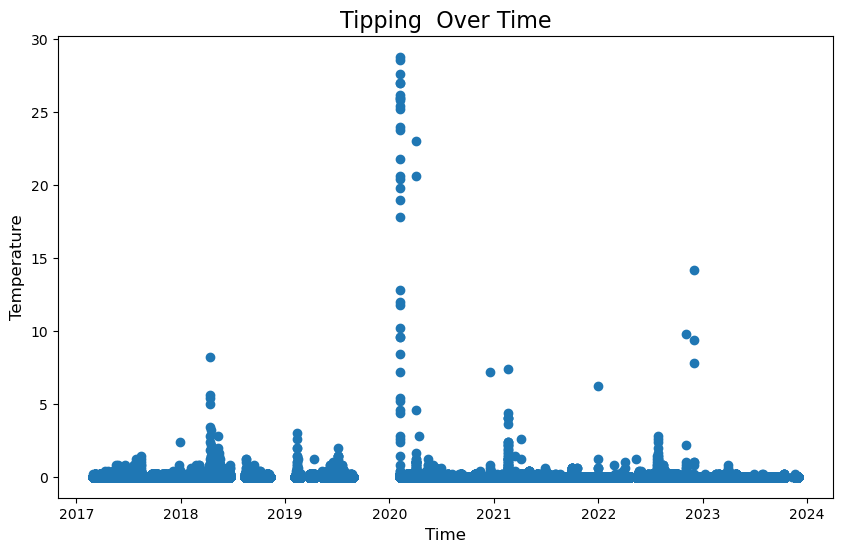

In [47]:
plt.figure(figsize=(10, 6))

# Plot the data presence over time
plt.figure(figsize=(10, 6))
plt.plot(marshall_combined_df['datetime'], marshall_combined_df['tipping'], marker='o', linestyle='None')
plt.title('Tipping  Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.show()


In [48]:
# Count the number of times tipping is 0.0
tipping_zero_count = marshall_combined_df[marshall_combined_df['tipping'] == 0.0].shape[0]

# Count the number of times tipping is non-zero and not NaN
tipping_non_zero_count = marshall_combined_df[(marshall_combined_df['tipping'] != 0.0) & (marshall_combined_df['tipping'].notna())].shape[0]

# Total count of rows where tipping is not NaN
tipping_total_count = marshall_combined_df[marshall_combined_df['tipping'].notna()].shape[0]

# Print the counts
print(f"Tipping equals 0.0: {tipping_zero_count}")
print(f"Tipping is non-zero and not NaN: {tipping_non_zero_count}")
print(f"Total number of tipping measurements (non-NaN): {tipping_total_count}")

# Calculate percentages
tipping_zero_percentage = (tipping_zero_count / tipping_total_count) * 100
tipping_non_zero_percentage = (tipping_non_zero_count / tipping_total_count) * 100

print(f"Percentage of tipping values equal to 0.0: {tipping_zero_percentage:.2f}%")
print(f"Percentage of tipping values non-zero: {tipping_non_zero_percentage:.2f}%")

Tipping equals 0.0: 2755485
Tipping is non-zero and not NaN: 4336
Total number of tipping measurements (non-NaN): 2759821
Percentage of tipping values equal to 0.0: 99.84%
Percentage of tipping values non-zero: 0.16%


In [8]:
# Initialize the converter
converter = DatToNcAllVar(
    name="Vienna_AllVar",
    directory="measurements/Vienna",
    target_directory="station_data_as_nc",
    hourly=True,
    keep_original=False
)


In [9]:
# Run the conversion process
converter.execute()


Extracting ViennaAllVar...


100%|██████████| 1857/1857 [00:23<00:00, 77.60it/s] 


Saving to station_data_as_nc/viennaallvar.nc


/Users/ferdinand/Desktop/MasterThesis/digital-twin-for-weather-station/station/dat_to_nc_all_var.py:233: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  self.dataframe[col] = pd.to_numeric(self.dataframe[col], errors='ignore')


In [10]:
ds = xr.open_dataset("station_data_as_nc/vienna.nc")

In [7]:
ds

<xarray.Dataset> Size: 9MB
Dimensions:      (time: 44554, lat: 1, lon: 1)
Coordinates:
  * time         (time) datetime64[ns] 356kB 2017-04-24T07:00:00 ... 2022-05-...
  * lat          (lat) float64 8B 48.23
  * lon          (lon) float64 8B 16.36
Data variables: (12/23)
    bmp180_temp  (time, lat, lon) float64 356kB ...
    bmp180_pres  (time, lat, lon) float64 356kB ...
    bmp180_slp   (time, lat, lon) float64 356kB ...
    bmp180_alt   (time, lat, lon) float64 356kB ...
    bmp280_temp  (time, lat, lon) float64 356kB ...
    bmp280_pres  (time, lat, lon) float64 356kB ...
    ...           ...
    vis_light    (time, lat, lon) float64 356kB ...
    ir_light     (time, lat, lon) float64 356kB ...
    uv_light     (time, lat, lon) float64 356kB ...
    wind_dir     (time, lat, lon) float64 356kB ...
    wind_speed   (time, lat, lon) float64 356kB ...
    tas          (time, lat, lon) float64 356kB ...